In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=88423bb33f9ee19e1a56d0132dc363692a33188155401c96d7abab110737f6b1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


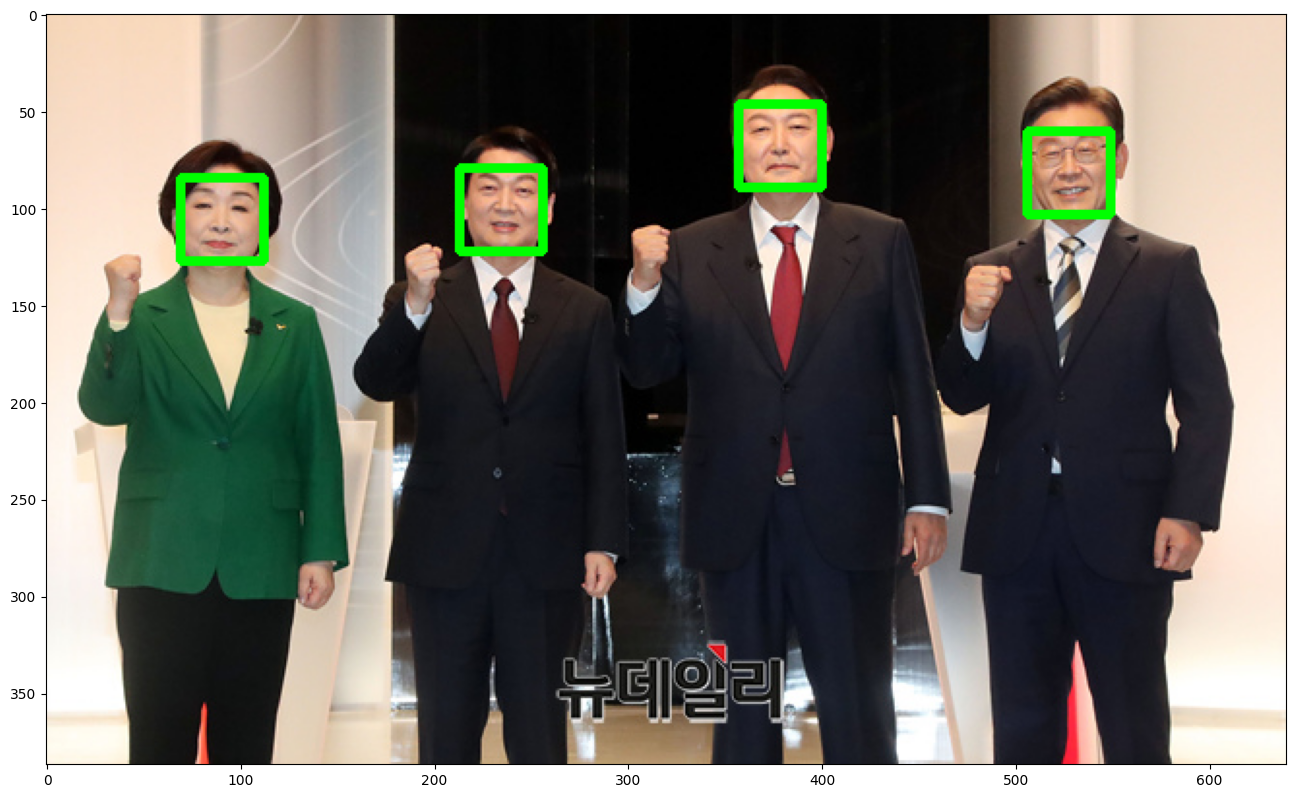

In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = "/abcde.jpg"

image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 3)

# 이미지 버퍼 출력
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(image)
plt.show()

In [ ]:
print("사람수는 {}명입니다.".format(len(face_locations)))

사람수는 10명입니다.


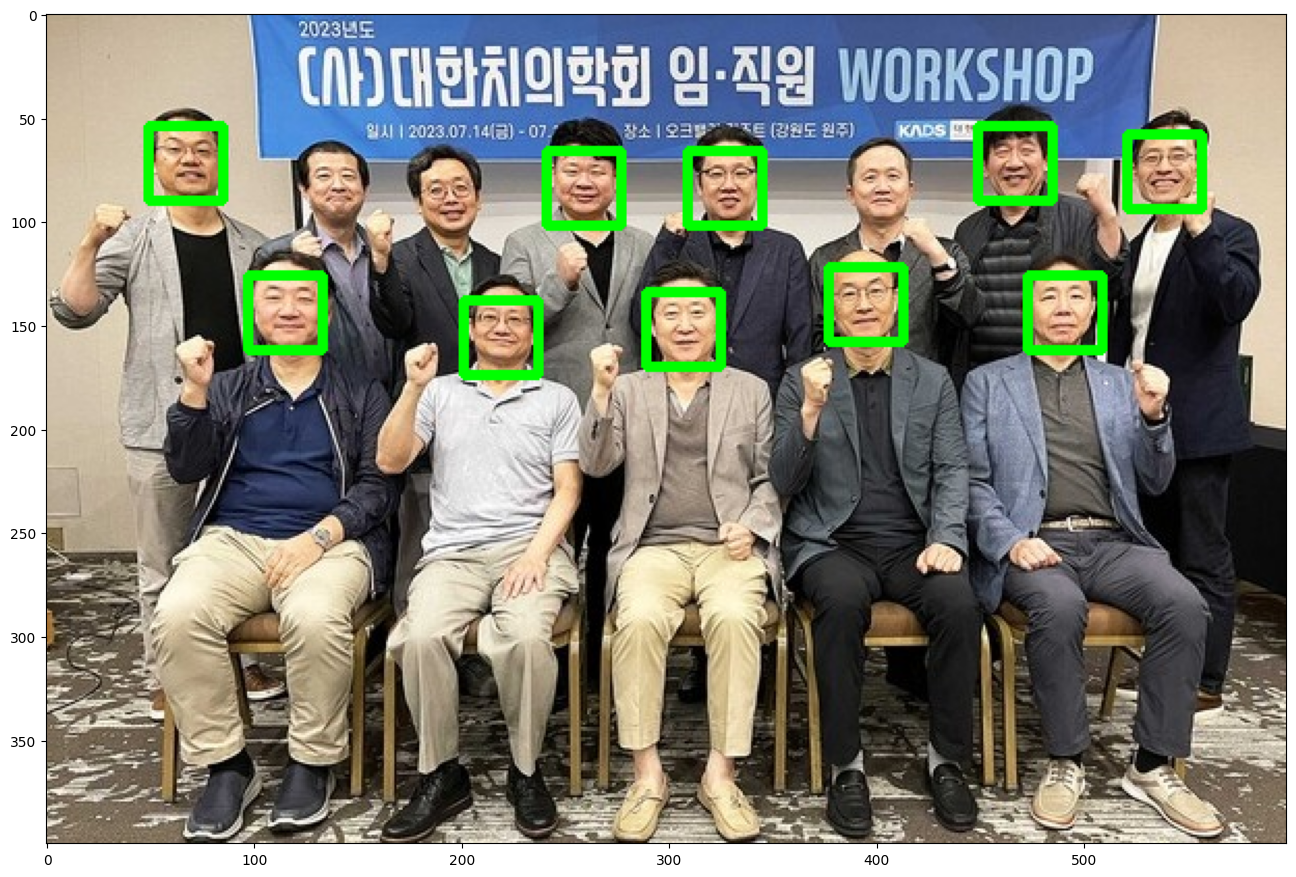

In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = "/tes.jpg"

image2 = fr.load_image_file(image_path)
face_locations2 = fr.face_locations(image2)

for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image2, (left, top), (right, bottom), (0,255,0), 3)

# 이미지 버퍼 출력
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(image2)
plt.show()

In [ ]:
print("사람수는 {}명입니다.".format(len(face_locations2)))

사람수는 10명입니다.


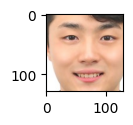

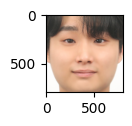

In [ ]:
plt.rcParams["figure.figsize"] = (1,1)

known_person_list = []
known_person_list.append(fr.load_image_file("/min.jpg"))
known_person_list.append(fr.load_image_file("/IMG_4293.JPG"))

# 얼굴을 인식을 하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:

  # 얼굴좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
  plt.imshow(face)
  plt.show()

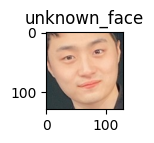

In [ ]:
# 기존리스트에 없는 새로운 파일을 열어서
unknown_person = fr.load_image_file("/12334.jpg")

#얼굴좌표를 알아내서 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

#unknown_face이라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

In [ ]:
import face_recognition

# Load the jpg files into numpy arrays
biden_image = face_recognition.load_image_file("/biden.jpg")
obama_image = face_recognition.load_image_file("/obama.jpg")
unknown_image = face_recognition.load_image_file("/obma2.jpg")

# Get the face encodings for each face in each image file
# Since there could be more than one face in each image, it returns a list of encodings.
# But since I know each image only has one face, I only care about the first encoding in each image, so I grab index 0.
try:
    biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
    obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()

known_faces = [
    biden_face_encoding,
    obama_face_encoding
]

# results is an array of True/False telling if the unknown face matched anyone in the known_faces array
results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

print("Is the unknown face a picture of Biden? {}".format(results[0]))
print("Is the unknown face a picture of Obama? {}".format(results[1]))
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

Is the unknown face a picture of Biden? False
Is the unknown face a picture of Obama? True
Is the unknown face a new person that we've never seen before? False


In [ ]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 사전 훈련된 캐스케이드 분류기를 로드합니다.

cascade_filename = '/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_filename)

# 이미지를 로드합니다.
img1 = cv2.imread('/3333.jpg')
img2 = cv2.imread('/min.jpg')


In [ ]:
# 이미지에서 얼굴을 감지하는 함수
def detect_faces(img, cascade):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5, minSize=(20, 20))
    return faces

# 감지된 얼굴에서 특징을 추출하는 함수
def extract_features(face):
    x, y, w, h = face
    face_roi = img1[y:y+h, x:x+w]
    # 여기에서 얼굴_roi에서 특징을 추출할 수 있습니다 (예: HOG, 딥 러닝 임베딩)
    # 이 예에서는 특징 추출을 위한 더미 특징 벡터를 사용합니다.
    feature_vector = np.random.rand(128)  # 특징 추출을 위한 더미 벡터
    return feature_vector

# img1의 여러 얼굴 중 하나를 선택하는 함수
def select_face_to_compare(img, cascade):
    # 여러 얼굴 중 하나를 선택하거나 자신의 로직을 사용하여 선택합니다.
    # 이 예시에서는 가장 처음에 감지된 얼굴을 선택합니다.
    faces = detect_faces(img, cascade)
    if len(faces) > 0:
        return faces[0]  # 가장 처음에 감지된 얼굴 선택
    else:
        return None

# 특징을 추출하고 비교하기 위한 함수
def calculate_similarity(img1, img2, cascade):
    # img2에서 얼굴을 감지합니다.
    faces2 = detect_faces(img2, cascade)

    if len(faces2) == 0:
        print("img2에서 얼굴을 찾을 수 없습니다.")
        return

    # 첫 번째 감지된 얼굴에서 특징을 추출합니다.
    features2 = extract_features(faces2[0])
    selected_face = select_face_to_compare(img1, cascade)
    if selected_face is None:
        print("img1에서 비교할 얼굴을 찾을 수 없습니다.")
        return

    features1 = extract_features(selected_face)
    similarity = cosine_similarity([features1], [features2])

    return similarity[0][0]

# img1의 얼굴과 img2의 얼굴 간의 유사성을 계산합니다.
similarity = calculate_similarity(img1, img2, cascade)

print(f"이미지 유사성: {similarity}")

img1에서 비교할 얼굴을 찾을 수 없습니다.
이미지 유사성: None


False [0.43653591]


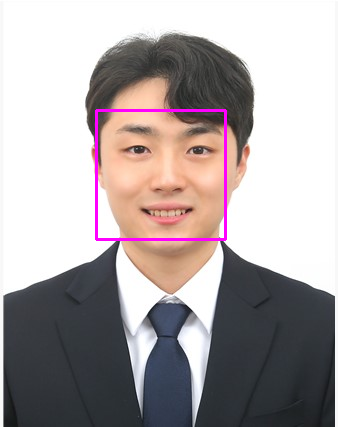

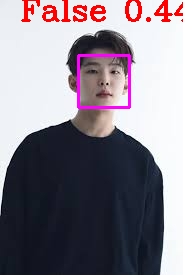

-1

In [ ]:
import cv2
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow

imgElon = face_recognition.load_image_file('/content/min.jpg') #인코딩에 사용할 이미지 가져오기
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)  #RGB로 변환
imgTest = face_recognition.load_image_file('/content/paul.jpg')  #Test 이미지 가져오기
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB) #Tset 이미지 RGB로 변환

#얼굴의 위치 같게 만들기
faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]   #감지할 얼굴 인코딩, 첫번째 요소만 가져오기
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]), (faceLoc[1],faceLoc[2]),(255,0,255),2) #우리가 얼굴을 감지한 위치를 확인하기 위해 사각형을 이미지에 그림

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]   #Test이미지에 대한 첫번째 요소만 가져오기
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]), (faceLocTest[1],faceLocTest[2]),(255,0,255),2) #Test 이미지에 사각형 이미지

results = face_recognition.compare_faces([encodeElon],encodeTest) #인코딩 이미지와 Test 이미지 간의 비교하기
faceDis = face_recognition.face_distance([encodeElon],encodeTest) #이미지 유사성 알기, (==> 얼굴 간의 오차 느낌인거 같음)

if faceDis[0] > 0.3:
  total = False
else:
  total = True

print(total, 1 - faceDis) #두 개의 이미지가 서로 같으면 True, 다른 이미지일 경우 False를 출력한다


#이미지에 대한 결과랑 유사성을 Test 이미지에 명시해주기, round()는 유사성을 소수점 둘째짜리로 반올림 한다는 뜻
cv2.putText(imgTest, f'{total} {1 - round(faceDis[0], 2)}', (20, 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

cv2_imshow(imgElon) #인코딩 이미지 불러오기
cv2_imshow(imgTest) #Test 이미지 불러오기
cv2.waitKey(0)

[False] [0.15069114]


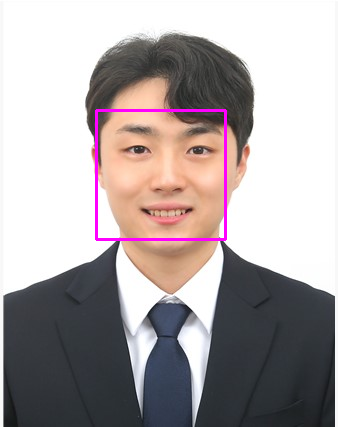

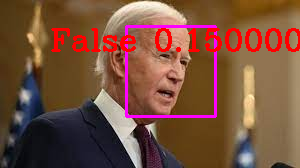

-1

In [ ]:
import cv2
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow

imgElon = face_recognition.load_image_file('/content/min.jpg') #인코딩에 사용할 이미지 가져오기
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)  #RGB로 변환
imgTest = face_recognition.load_image_file('/content/biden.jpg')  #Test 이미지 가져오기
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB) #Tset 이미지 RGB로 변환

#얼굴의 위치 같게 만들기
faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]   #감지할 얼굴 인코딩, 첫번째 요소만 가져오기
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]), (faceLoc[1],faceLoc[2]),(255,0,255),2) #우리가 얼굴을 감지한 위치를 확인하기 위해 사각형을 이미지에 그림

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]   #Test이미지에 대한 첫번째 요소만 가져오기
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]), (faceLocTest[1],faceLocTest[2]),(255,0,255),2) #Test 이미지에 사각형 이미지

results = face_recognition.compare_faces([encodeElon],encodeTest) #인코딩 이미지와 Test 이미지 간의 비교하기
faceDis = face_recognition.face_distance([encodeElon],encodeTest) #이미지 유사성 알기, (==> 얼굴 간의 오차 느낌인거 같음)

if faceDis[0] > 0.3:
  total = False
else:
  total = True

print(results, 1 - faceDis) #두 개의 이미지가 서로 같으면 True, 다른 이미지일 경우 False를 출력한다


#이미지에 대한 결과랑 유사성을 Test 이미지에 명시해주기, round()는 유사성을 소수점 둘째짜리로 반올림 한다는 뜻
cv2.putText(imgTest, f'{total} {1 - round(faceDis[0], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

cv2_imshow(imgElon) #인코딩 이미지 불러오기
cv2_imshow(imgTest) #Test 이미지 불러오기
cv2.waitKey(0)

[True] [0.77273885]


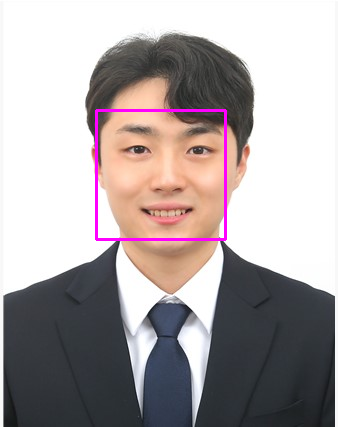

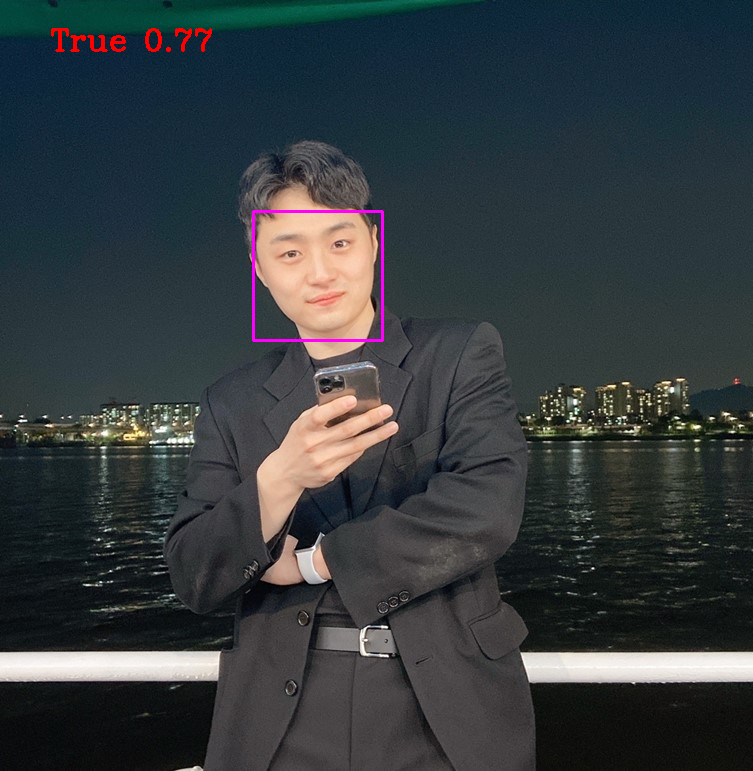

-1

In [ ]:
import cv2
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow

imgElon = face_recognition.load_image_file('/content/min.jpg') #인코딩에 사용할 이미지 가져오기
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)  #RGB로 변환
imgTest = face_recognition.load_image_file('/content/12334.jpg')  #Test 이미지 가져오기
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB) #Tset 이미지 RGB로 변환

#얼굴의 위치 같게 만들기
faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]   #감지할 얼굴 인코딩, 첫번째 요소만 가져오기
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]), (faceLoc[1],faceLoc[2]),(255,0,255),2) #우리가 얼굴을 감지한 위치를 확인하기 위해 사각형을 이미지에 그림

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]   #Test이미지에 대한 첫번째 요소만 가져오기
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]), (faceLocTest[1],faceLocTest[2]),(255,0,255),2) #Test 이미지에 사각형 이미지

results = face_recognition.compare_faces([encodeElon],encodeTest) #인코딩 이미지와 Test 이미지 간의 비교하기
faceDis = face_recognition.face_distance([encodeElon],encodeTest) #이미지 유사성 알기, (==> 얼굴 간의 오차 느낌인거 같음)

if faceDis[0] > 0.3:
  total = False
else:
  total = True

print(results, 1 - faceDis) #두 개의 이미지가 서로 같으면 True, 다른 이미지일 경우 False를 출력한다


#이미지에 대한 결과랑 유사성을 Test 이미지에 명시해주기, round()는 유사성을 소수점 둘째짜리로 반올림 한다는 뜻
cv2.putText(imgTest, f'{total} {1 - round(faceDis[0], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

cv2_imshow(imgElon) #인코딩 이미지 불러오기
cv2_imshow(imgTest) #Test 이미지 불러오기
cv2.waitKey(0)